# Introduction
* ANNs are the core of deep learning and allow it to be versitile, powerful and scalable.
* First proposed model had neurons that has one or more binary (on/off) inputs and one output
* The output is activated when more than a certain number of its inputs are active
* Perceptron is the simplest ANN architecture
* Based on threeshold logic unit (TLU) or linear threshold unit (LTU)
* TLU has weights for every feature and computers the linear function z = w(Transposed)x + b
* Very similar to logistical regression but preforms a step function instead of a logistic function
* Most common step function is Heaviside step function where the output is 0 if z is less than 0, 1 otherwise
* Fully connected layer or dense layer means every TLU is connected to every other input.
* Inputs is the input layer and outputs is the output layer


In [38]:
import sklearn
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MAX_VLOG_LEVEL'] = '-1'

In [4]:
import tensorflow as tf

2024-05-10 09:33:53.952945: E external/local_xla/xla/stream_executor/plugin_registry.cc:93] Invalid plugin kind specified: DNN
2024-05-10 09:33:54.071863: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [11]:
# Basic Perceptron based model for iris dataset
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)

In [12]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [13]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 0)  # Iris setosa

percep_model = Perceptron(random_state=42)
percep_model.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
percep_model.predict(X_new)

array([ True, False])

* Problems that a single layer perceptron model is it is limited. It can't some simple problems like XOR
* Thats where multi layer perceptrons come in (MLP)
* This MLP is composed of one or more <i>hidden layers</i> on top of the <i>input layer</i> and the <i>output layer</i>
* lower layers are close to inputs while upper layers are close to outputs
* When there is a deep stack of hidden layers then it is called a deep neural network (more than 2 hidden layers)
* For regression tasks like predicting the house price, you only need one output layer neuron.
* for mulitvariate like a pixel position you would need one output neuron for each dimension
* Simple bounding box would need 4 output neurons (Pixel X, Pixel Y, Width, Heigh)

In [14]:
# Predict housing problem example using DNN
from sklearn.datasets import fetch_california_housing

cal_housing = fetch_california_housing(as_frame=True)

In [15]:
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [16]:
from sklearn.model_selection import train_test_split

X = cal_housing.data
y = cal_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor

In [18]:
pipeline = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(50, 50, 50), random_state=42))

In [19]:
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(50, 50, 50),
                              random_state=42))])

In [20]:
pipeline = pipeline.fit(X_train, y_train)

In [21]:
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score, recall_score

In [22]:
test_pred = pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

Root Mean Squared Error: 0.5272453099436719
R-squared Score: 0.7878619412156571


# Testing MLPClassifer On Iris Data Set

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder

In [24]:
iris_features = iris.data
iris_labels = iris.target
iris_label_names = iris.target_names

In [25]:
iris_train, iris_test, iris_train_label, iris_test_label = train_test_split(iris_features, iris_labels, random_state=42)

iris_clf_pipeline = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(10), random_state=42, max_iter=10_000))
iris_clf_pipeline = iris_clf_pipeline.fit(iris_train, iris_train_label)

In [26]:
accuracy = iris_clf_pipeline.score(iris_test, iris_test_label)
print(f'Accuracy score: {accuracy}')

Accuracy score: 1.0


# Exercise 1 Tensor Flow Playground 
* Book said to start going through playground.tensorflow.org to get some practice before moving through the chapter.
* Showed how different parameters affect training time, overfitting/underfitting. How small networks will struggle to fit a model while bigger ones will fit the model but training time might be longer as the platoes of improvement are longer.
* Learning rate will prevent convergence if too high and too low will be too slow for training.
* Activation functions change how the distinctions are drawn by the neutrons
* Example of this is ReLU vs tanh. Relu has distinct lines while tanh is more curved.
* More features can also converge on the problem faster it seems based on the diagram.
* Batch sizes, the larger will ignore more outlying test data while smaller batches will see those outlying ones more.

# Implementing MLPS with Keras (TensorFlow)

In [27]:
# Image Classifier using TensorFlow
from tensorflow.keras.datasets import fashion_mnist

In [28]:
fashion_data = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [29]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_data
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [30]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', '', 'Ankle boot']

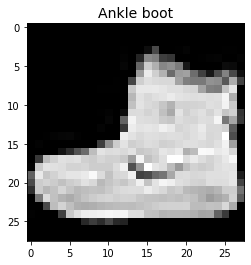

In [33]:
import matplotlib.pyplot as plt

plt.title(class_names[y_train[0]])
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [34]:
tf.random.set_seed(42)

In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

2024-05-10 09:36:34.105550: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:34.107385: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:34.115237: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:34.116587: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:34.124298: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:34.125290: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


In [40]:
# Same thing can be accomplished with this
tf.keras.backend.clear_session()
housing = fetch_california_housing(as_frame=True)
cal_x_train_full, cal_x_test, cal_y_train_full, cal_y_test = train_test_split(
    housing.data, housing.target, random_state=42)
cal_x_train, cal_x_val, cal_y_train, cal_y_val = train_test_split(
    cal_x_train_full, cal_y_train_full, random_state=42)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-05-10 09:36:36.682418: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:36.683260: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:36.687469: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:36.688400: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:36.689969: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:36.690784: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:36.691383: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:36.691993: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:36.692672: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:36

In [41]:
# After creating the model you need to compile it before training providing a loss, optimizer and any metrics
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

# We are doing sparse_categorical_crossentropy because we only have one value for the class label.
# If it was instead One hot encoded for the label we would use categorical_crossentropy

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

2024-05-10 09:36:44.461499: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:44.462433: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:44.463801: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:44.464418: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:44.467773: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:44.468970: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:44.470453: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


Epoch 1/30


2024-05-10 09:36:44.677344: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:44.679950: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:44.689163: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:44.695032: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:44.695614: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:44.700718: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:44.701494: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:44.753575: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:44.754798: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-05-10 09:36:44

UnknownError: Graph execution error:

Detected at node sequential/dense/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>

  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance

  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start

  File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 461, in dispatch_queue

  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 450, in process_one

  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 357, in dispatch_shell

  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 652, in execute_request

  File "/usr/lib/python3/dist-packages/ipykernel/ipkernel.py", line 353, in do_execute

  File "/usr/lib/python3/dist-packages/ipykernel/zmqshell.py", line 532, in run_cell

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2914, in run_cell

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell

  File "/usr/lib/python3/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3457, in run_code

  File "/tmp/ipykernel_8994/1288945014.py", line 9, in <module>

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py", line 255, in call

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/activations.py", line 306, in relu

  File "/home/blake/.local/lib/python3.10/site-packages/keras/src/backend.py", line 5395, in relu

JIT compilation failed.
	 [[{{node sequential/dense/Relu}}]] [Op:__inference_train_function_967]

In [31]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.8623 - loss: 0.4020 - val_accuracy: 0.8562 - val_loss: 0.4021
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step - accuracy: 0.8636 - loss: 0.3995 - val_accuracy: 0.8572 - val_loss: 0.4002
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.8642 - loss: 0.3971 - val_accuracy: 0.8576 - val_loss: 0.3983
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.8653 - loss: 0.3947 - val_accuracy: 0.8584 - val_loss: 0.3966
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - accuracy: 0.8662 - loss: 0.3925 - val_accuracy: 0.8586 - val_loss: 0.3949
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step - accuracy: 0.8665 - loss: 0.3903 - val_accuracy: 0.8598 - val_loss: 0.3932
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 508us/step - accuracy: 0.8673 - loss: 0.3882 - val_accuracy: 0.8618 - val_loss: 0.3917
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.8680 -

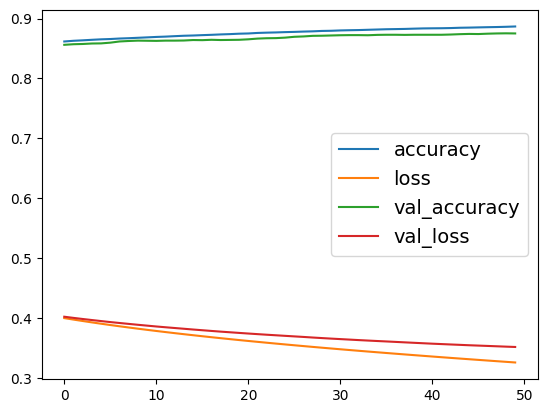

In [32]:
import pandas as pd

pd.DataFrame(history.history).plot()
plt.show()

In [33]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.8715 - loss: 0.3786


[0.3839667737483978, 0.8671000003814697]

In [34]:
y_prob = model.predict(X_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [35]:
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.11, 0.  , 0.8 ]],
      dtype=float32)

# Building Regression MLP With Sequential API

In [36]:
tf.random.set_seed(42)

# Need to get the california data set
from tensorflow.keras.datasets import california_housing

In [37]:
(cal_x_train, cal_y_train), (cal_x_test, cal_y_test) = california_housing.load_data()

In [38]:
cal_x_train.shape

(16512, 8)

In [39]:
cal_x_test.shape

(4128, 8)

In [40]:
# Pull 4128 out of the housing set for validation
cal_x_val, cal_y_val = cal_x_train[-4128:], cal_y_train[-4128:]
cal_x_train, cal_y_train = cal_x_train[:-4128], cal_y_train[:-4128]

In [41]:
cal_x_val.shape

(4128, 8)

In [42]:
cal_x_train.shape

(12384, 8)

In [43]:
# Using previous housing to be consistent with thje book
housing = fetch_california_housing()
cal_x_train_full, cal_x_test, cal_y_train_full, cal_y_test = train_test_split(
    housing.data, housing.target, random_state=42)
cal_x_train, cal_x_val, cal_y_train, cal_y_val = train_test_split(
    cal_x_train_full, cal_y_train_full, random_state=42)

In [44]:
# Normalize layer, Similar to StandardScalar() in SKlearn
norm_layer = tf.keras.layers.Normalization()
cal_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(cal_x_train.shape[1:]),
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1),
])
cal_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,618 (21.95 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

In [45]:
# Need loss and optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
cal_model.compile(loss='mse', optimizer=optimizer, metrics=["RootMeanSquaredError"])

# Need to call adapt before model to normalize properly
norm_layer.adapt(cal_x_train)
history = cal_model.fit(cal_x_train, cal_y_train, epochs=20, validation_data=(cal_x_val, cal_y_val))

mse_test, rmse_test = cal_model.evaluate(cal_x_test, cal_y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - RootMeanSquaredError: 1.1262 - loss: 1.3429 - val_RootMeanSquaredError: 0.7244 - val_loss: 0.5248
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - RootMeanSquaredError: 0.6370 - loss: 0.4064 - val_RootMeanSquaredError: 0.6630 - val_loss: 0.4395
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - RootMeanSquaredError: 0.6108 - loss: 0.3734 - val_RootMeanSquaredError: 0.9314 - val_loss: 0.8675
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - RootMeanSquaredError: 0.5930 - loss: 0.3519 - val_RootMeanSquaredError: 0.9335 - val_loss: 0.8715
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - RootMeanSquaredError: 0.5808 - loss: 0.3375 - val_RootMeanSquaredError: 1.1285 - val_loss: 1.2734
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - RootMeanSquaredError: 0.5720 - loss: 0.3273 - val_RootMeanSquaredError: 0.8919 - val_loss: 0.7955
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - RootMeanSquaredError

In [46]:
print(f'MSE: {mse_test}')
print(f'RMSE: {rmse_test}')

MSE: 0.2812858521938324
RMSE: 0.5303638577461243


# Building Complex Models Using the Functional API

In [47]:
tf.keras.backend.clear_session()
input_layer = tf.keras.layers.Input(cal_x_train[0,:].shape)
normalized = tf.keras.layers.Normalization()
norm_layer = normalized(input_layer)

hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_layer)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat_layer = tf.keras.layers.Concatenate()([hidden2, norm_layer])
output_layer = tf.keras.layers.Dense(1)(concat_layer)

deep_and_wide_model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])
deep_and_wide_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ dense_1[0][0],    │
│ (Concatenate)       │                   │            │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [48]:
# Need loss and optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
deep_and_wide_model.compile(loss='mse', optimizer=optimizer, metrics=["RootMeanSquaredError"])

# Need to call adapt before model to normalize properly
normalized.adapt(cal_x_train)
history = deep_and_wide_model.fit(cal_x_train, cal_y_train, epochs=20, validation_data=(cal_x_val, cal_y_val))

mse_test, rmse_test = deep_and_wide_model.evaluate(cal_x_test, cal_y_test)
print(f'MSE: {mse_test}')
print(f'RMSE: {rmse_test}')

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - RootMeanSquaredError: 1.3700 - loss: 2.0002 - val_RootMeanSquaredError: 0.9973 - val_loss: 0.9946
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - RootMeanSquaredError: 0.7450 - loss: 0.5569 - val_RootMeanSquaredError: 1.1882 - val_loss: 1.4118
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - RootMeanSquaredError: 0.6547 - loss: 0.4290 - val_RootMeanSquaredError: 1.5361 - val_loss: 2.3596
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - RootMeanSquaredError: 0.6301 - loss: 0.3973 - val_RootMeanSquaredError: 1.4617 - val_loss: 2.1367
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - RootMeanSquaredError: 0.6148 - loss: 0.3781 - val_RootMeanSquaredError: 1.0286 - val_loss: 1.0579
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - RootMeanSquaredError: 0.6032 - loss: 0.3641 - val_RootMeanSquaredError: 0.9051 - val_loss: 0.8193
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - RootMeanSquaredError

In [50]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="TensorBoardLogs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [52]:
# Rebuild old model for tensorboard viewing
tf.keras.backend.clear_session()
input_layer = tf.keras.layers.Input(cal_x_train[0,:].shape)
normalized = tf.keras.layers.Normalization()
norm_layer = normalized(input_layer)

hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_layer)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat_layer = tf.keras.layers.Concatenate()([hidden2, norm_layer])
output_layer = tf.keras.layers.Dense(1)(concat_layer)

deep_and_wide_model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])
deep_and_wide_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ dense_1[0][0],    │
│ (Concatenate)       │                   │            │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [82]:
# Need loss and optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-3)
deep_and_wide_model.compile(loss='mse', optimizer=optimizer, metrics=["RootMeanSquaredError"])

# Need to call adapt before model to normalize properly
normalized.adapt(cal_x_train)

In [83]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(get_run_logdir("TensorBoardLogs/DeepAndWideModel_4_19_2024"))

history = deep_and_wide_model.fit(cal_x_train, cal_y_train, epochs=20, validation_data=(cal_x_val, cal_y_val), callbacks=[tensorboard_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - RootMeanSquaredError: 0.5488 - loss: 0.3012 - val_RootMeanSquaredError: 1.3374 - val_loss: 1.7886
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - RootMeanSquaredError: 0.5479 - loss: 0.3003 - val_RootMeanSquaredError: 1.2371 - val_loss: 1.5304
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - RootMeanSquaredError: 0.5435 - loss: 0.2955 - val_RootMeanSquaredError: 2.2323 - val_loss: 4.9833
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - RootMeanSquaredError: 0.5542 - loss: 0.3074 - val_RootMeanSquaredError: 1.9340 - val_loss: 3.7404
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - RootMeanSquaredError: 0.5477 - loss: 0.3002 - val_RootMeanSquaredError: 1.7744 - val_loss: 3.1486
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - RootMeanSquaredError: 0.5489 - loss: 0.3014 - val_RootMeanSquaredError: 1.2429 - val_loss: 1.5447
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - RootMeanSquaredError

In [2]:
%reload_ext tensorboard
%tensorboard --logdir="TensorBoardLogs/" --bind_all

In [84]:
test_logdir = get_run_logdir("TensorBoardLogs/DeepAndWideModel_4_19_2024")
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

fashion_mnist = fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [12]:
tf.random.set_seed(42)
import keras_tuner as kt

In [26]:
# kt.HyperParameters.Choice()

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value = 0, max_value = 8, default = 2)
    n_neurons = hp.Int("n_neurons", min_value = 16, max_value = 256) # default is the min by default
    learning_rate = hp.Float("learning_rate", min_value = 1e-4, max_value = 1e-2, sampling = "log")
    optimizer = hp.Choice("optimizer", values = ["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for n_hid in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [27]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=10, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 10 Complete [00h 00m 12s]
val_accuracy: 0.8601999878883362

Best val_accuracy So Far: 0.8705999851226807
Total elapsed time: 00h 01m 55s


In [32]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [33]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 7,
 'n_neurons': 124,
 'learning_rate': 0.0005509513888645584,
 'optimizer': 'adam'}

In [34]:
random_search_tuner.oracle.get_best_trials(num_trials=1)[0].summary()

Trial 08 summary
Hyperparameters:
n_hidden: 7
n_neurons: 124
learning_rate: 0.0005509513888645584
optimizer: adam
Score: 0.8705999851226807


In [35]:
# Now that we have fined tuned. Train on all the data including validation data.
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 766us/step - accuracy: 0.8904 - loss: 0.3029
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.8944 - loss: 0.2895
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.8956 - loss: 0.2846
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.8984 - loss: 0.2767
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.9015 - loss: 0.2657
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.9012 - loss: 0.2683
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.9046 - loss: 0.2633
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.9075 - loss: 0.2546
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.9080 - loss: 0.2478
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.9104 - loss: 0.2408
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.8804 - loss: 0.3679


In [36]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [37]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [43]:
from pathlib import Path

root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 14s]
val_accuracy: 0.8402000069618225

Best val_accuracy So Far: 0.8679999709129333
Total elapsed time: 00h 07m 13s
